In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd #for data manipulation and analysis.
data = pd.read_csv('/content/drive/My Drive/Section 4 - Building an ANN/Churn_Modelling.csv')
data.head()#To see the first five Row's

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
#We will drop the columns('RowNumber','CustomerId','Surname') which are not usefull for predictions
data.drop(['RowNumber','CustomerId','Surname'],axis = 1 , inplace = True)

In [0]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
#What types of data we have?
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [0]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc.
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [0]:
data.describe(include = 'O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [0]:
#To plot the data we use 'Seaborn' and 'Matplotlib'.
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

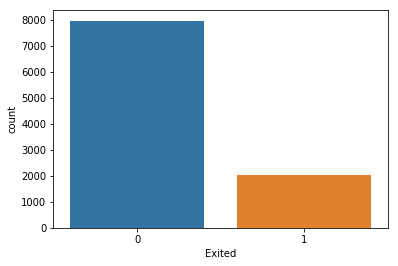

In [0]:
sns.countplot(x = 'Exited',data = data)

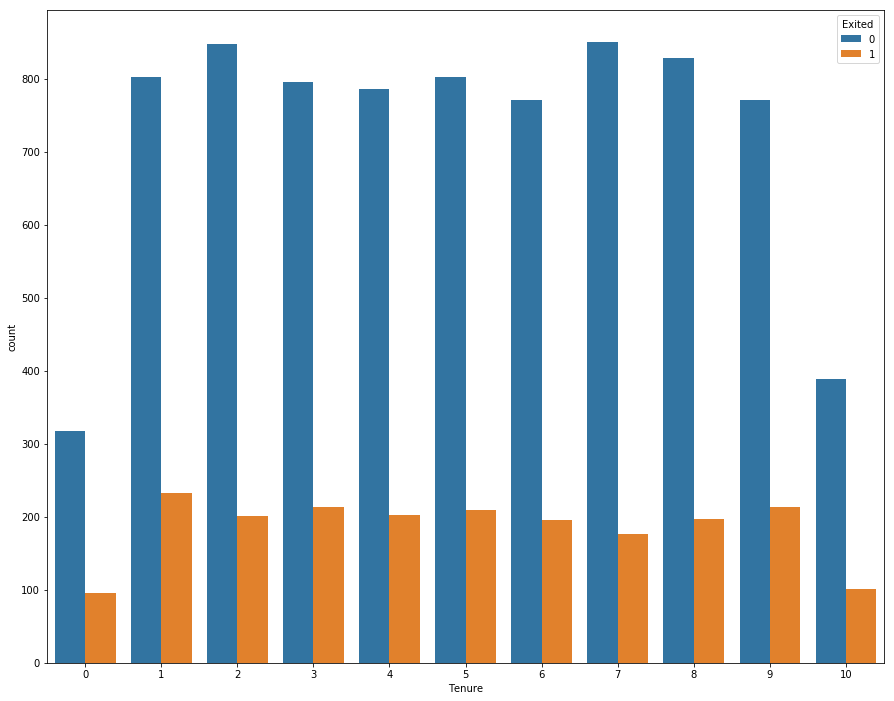

In [0]:
plt.figure(figsize = (15,12))
sns.countplot(x = 'Tenure',data = data,hue = 'Exited')

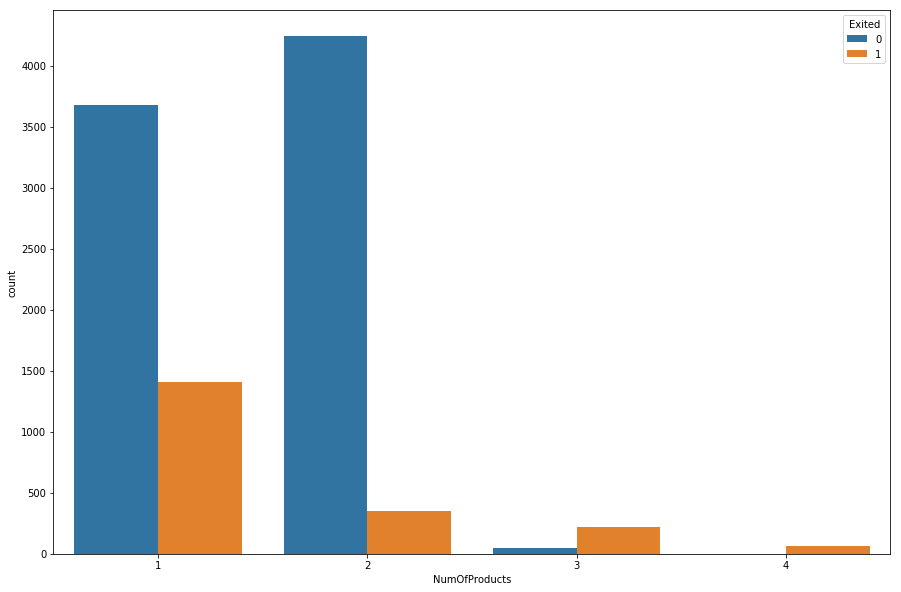

In [0]:
#Customers having 4 products will leave the bank.
plt.figure(figsize = (15,10))
sns.countplot(x = 'NumOfProducts',data = data,hue = 'Exited')

In [0]:
data['Exited'].value_counts()/len(data)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

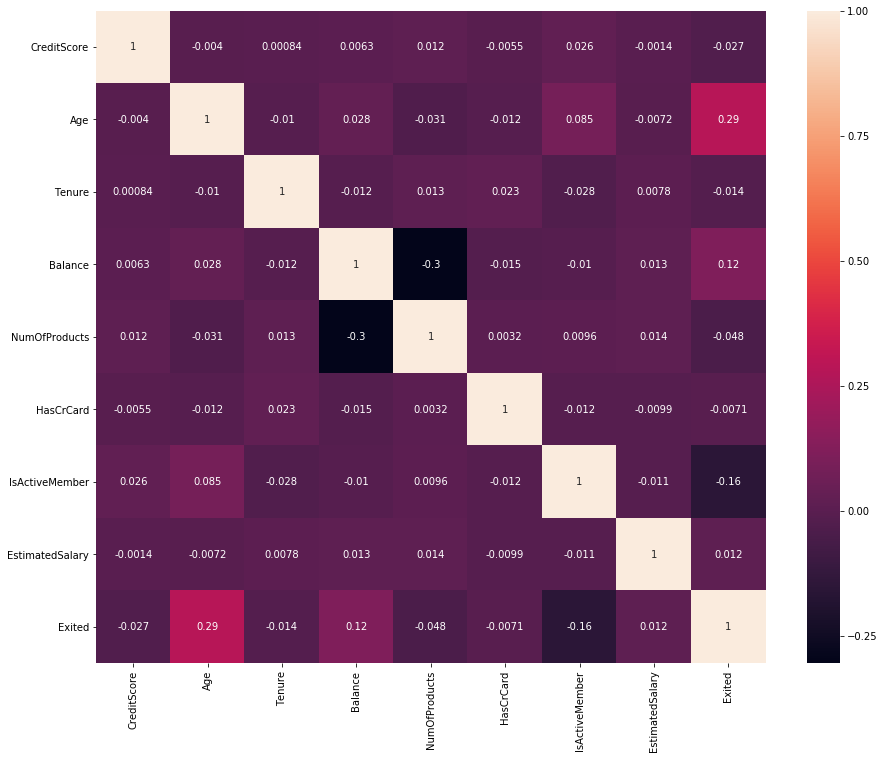

In [0]:
#Let's look the correlation between the variables
plt.figure(figsize = (15,12))
sns.heatmap(data.corr(),annot = True )

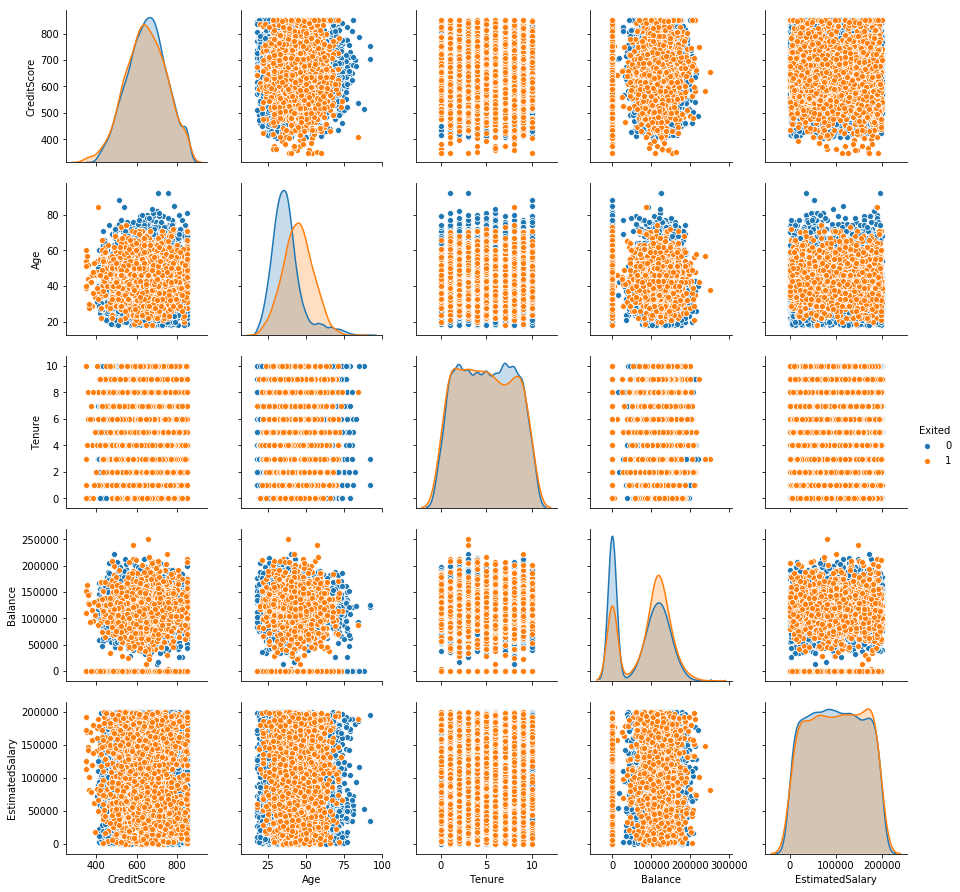

In [0]:
sns.pairplot(data = data , hue = 'Exited',vars = ['CreditScore','Age','Tenure','Balance','EstimatedSalary'])

In [0]:
#['Geography','Gender'] are categorical data we have to convert the data to numeric data inorder to build the prediction model
df = pd.get_dummies(data,columns = ['Geography','Gender'],drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [0]:
X = df.drop(['Exited'],axis = 1)
Y = df.Exited

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify = Y,test_size = 0.3,random_state = 42)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)

In [0]:
from keras.models import Sequential
from keras.layers import Dropout,Dense

Using TensorFlow backend.


In [0]:
help(Dense)

In [0]:
classifier = Sequential()
classifier.add(Dense(units = 10,activation = 'relu',kernel_initializer = 'uniform',input_dim = X_train.shape[1]))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 12 , activation = 'relu',kernel_initializer = 'uniform'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 12 , activation = 'relu',kernel_initializer = 'uniform'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 12 , activation = 'relu',kernel_initializer = 'uniform'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 1, activation = 'sigmoid',kernel_initializer = 'uniform'))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['accuracy'])


In [0]:
classifier.fit(X_train,Y_train,epochs = 100 , batch_size = 32)

In [0]:
prediction = classifier.predict(scale.transform(X_test))

In [0]:
from sklearn import metrics
metrics.confusion_matrix(prediction>0.5,Y_test)

array([[2352,  454],
       [  37,  157]])

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [0]:
def build_classifier():
  classifier = Sequential()
  classifier.add(Dense(units = 10,activation = 'relu',kernel_initializer = 'uniform',input_dim = X_train.shape[1]))
  classifier.add(Dropout(rate = 0.1))
  classifier.add(Dense(units = 12 , activation = 'relu',kernel_initializer = 'uniform'))
  classifier.add(Dropout(rate = 0.1))
  classifier.add(Dense(units = 12 , activation = 'relu',kernel_initializer = 'uniform'))
  classifier.add(Dropout(rate = 0.1))
  classifier.add(Dense(units = 12 , activation = 'relu',kernel_initializer = 'uniform'))
  classifier.add(Dropout(rate = 0.1))
  classifier.add(Dense(units = 1, activation = 'sigmoid',kernel_initializer = 'uniform'))
  classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['accuracy'])
  return classifier

In [0]:
classifier = KerasClassifier(build_fn = build_classifier,epochs = 100,batch_size = 32)
score = cross_val_score(estimator = classifier,X = X_train,y = Y_train,cv = 10)

In [0]:
score.mean(),score.var(),score.std()

(0.8290000002724784, 0.00034532653427123985, 0.018582963549209255)

In [0]:
def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units = 10,activation = 'relu',kernel_initializer = 'uniform',input_dim = X_train.shape[1]))
  classifier.add(Dropout(rate = 0.1))
  classifier.add(Dense(units = 12 , activation = 'relu',kernel_initializer = 'uniform'))
  classifier.add(Dropout(rate = 0.1))
  classifier.add(Dense(units = 12 , activation = 'relu',kernel_initializer = 'uniform'))
  classifier.add(Dropout(rate = 0.1))
  classifier.add(Dense(units = 12 ,activation = 'relu',kernel_initializer = 'uniform'))
  classifier.add(Dropout(rate = 0.1))
  classifier.add(Dense(units = 1, activation = 'sigmoid',kernel_initializer = 'uniform'))
  classifier.compile(optimizer = optimizer , loss = 'binary_crossentropy',metrics = ['accuracy'])
  return classifier

In [0]:
classifier = KerasClassifier(build_fn = build_classifier,epochs = 75,batch_size = 32)

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'optimizer' : ['SGD','adam','Adadelta','Adagrad']}
GridSearch = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = 'accuracy',cv = 5)

In [0]:
GridSearch = GridSearch.fit(X_train,Y_train)

In [0]:
GridSearch.best_params_

{'optimizer': 'Adadelta'}

In [0]:
GridSearch.best_score_

0.8552857142857143

In [0]:
classifier = build_classifier('Adadelta')
classifier.fit(X_train,Y_train,epochs = 200,batch_size = 32)
prediction = classifier.predict_classes(scale.transform(X_test))
metrics.confusion_matrix(prediction,Y_test)

In [0]:
metrics.accuracy_score(prediction,Y_test)

0.8656666666666667

In [0]:
print(metrics.classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2536
           1       0.55      0.72      0.63       464

    accuracy                           0.87      3000
   macro avg       0.75      0.81      0.77      3000
weighted avg       0.89      0.87      0.87      3000

